In [1]:
# Init Collab
# from google.colab import drive
# drive.mount('/content/gdrive')

# !unzip -q '/content/gdrive/MyDrive/Fish Classification/Fish_Dataset.zip'

Mounted at /content/gdrive


In [2]:
# Imports
import cv2
import math
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from util import *

In [3]:
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
# tf.config.experimental.set_virtual_device_configuration(physical_devices[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)])

-----------------
Reading in images
-----------------


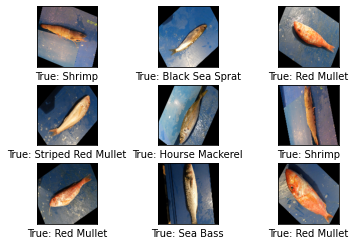

In [5]:
# Get and split dataset
img_arr, img_labels = read_in_images()
train_imgs, test_imgs, train_labels, test_labels = train_test_split(img_arr, img_labels, test_size = .2, random_state = 42)

# Binarize labels
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer().fit(train_labels)
y_train = label_bin.transform(train_labels)
y_test = label_bin.transform(test_labels)

plot_images(train_imgs[:9], train_labels[:9])

In [6]:
# Declare consts
img_shape_full = train_imgs[0].shape
img_size = img_shape_full[0]
img_size_flat = len(train_imgs[0].ravel())
img_shape = img_shape_full[:2]
num_classes = 9
num_channels = img_shape_full[-1]


In [7]:
# Init VGG-16 Model

# model = keras.models.Sequential([
#     keras.layers.InputLayer(input_shape=img_shape_full),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer1_conv1'),
#     keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer1_conv2'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer2_conv1'),
#     keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer2_conv2'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv1'),
#     keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv2'),
#     keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv3'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer4_conv1'),
#     keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer4_conv2'),
#     keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer4_conv3'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer5_conv1'),
#     keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer5_conv2'),
#     keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer5_conv3'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dense(1000, activation='relu'),
#     keras.layers.Dense(num_classes, activation='softmax')    
#   ])
# model.summary()

# model = keras.models.Sequential([
#     keras.layers.InputLayer(input_shape=img_shape_full),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer1_conv1'),
#     keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer1_conv2'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer2_conv1'),
#     keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer2_conv2'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer3_conv1'),
#     keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer3_conv2'),
#     keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer3_conv3'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer4_conv1'),
#     keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer4_conv2'),
#     keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer4_conv3'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer5_conv1'),
#     keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer5_conv2'),
#     keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer5_conv3'),
#     keras.layers.MaxPooling2D(pool_size=2, strides=2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dense(4096//2, activation='relu'),
#     keras.layers.Dense(1000, activation='relu'),
#     keras.layers.Dense(num_classes, activation='softmax')    
#   ])
# model.summary()

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=img_shape_full),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", name='layer1_conv1'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", name='layer1_conv2'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(filters=128,kernel_size=3, padding="same", name='layer2_conv1'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Conv2D(filters=128,kernel_size=3, padding="same", name='layer2_conv2'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(filters=512,kernel_size=3, padding="same", name='layer3_conv1'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Conv2D(filters=512,kernel_size=3, padding="same", name='layer3_conv2'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Conv2D(filters=512,kernel_size=3, padding="same", name='layer3_conv3'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(filters=128,kernel_size=3, padding="same", name='layer4_conv1'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Conv2D(filters=128,kernel_size=3, padding="same", name='layer4_conv2'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Conv2D(filters=128,kernel_size=3, padding="same", name='layer4_conv3'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", name='layer5_conv1'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", name='layer5_conv2'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", name='layer5_conv3'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),

    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')    
  ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
layer1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
layer1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0

Training...
Epoch 1/10
225/225 [==============================] - 41s 101ms/step - loss: 1.8420 - accuracy: 0.3709
Epoch 2/10
225/225 [==============================] - 23s 101ms/step - loss: 0.4164 - accuracy: 0.8958
Epoch 3/10
225/225 [==============================] - 23s 101ms/step - loss: 0.1004 - accuracy: 0.9830
Epoch 4/10
225/225 [==============================] - 23s 101ms/step - loss: 0.0335 - accuracy: 0.9972
Epoch 5/10
225/225 [==============================] - 23s 101ms/step - loss: 0.0163 - accuracy: 0.9988
Epoch 6/10
225/225 [==============================] - 23s 101ms/step - loss: 0.0099 - accuracy: 0.9995
Epoch 7/10
225/225 [==============================] - 23s 101ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 8/10
225/225 [==============================] - 23s 101ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 9/10
225/225 [==============================] - 23s 101ms/step - loss: 0.0062 - accuracy: 0.9994
Epoch 10/10
225/225 [==============================] - 23s 10

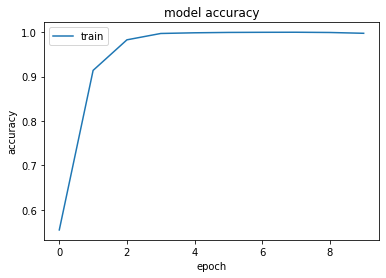

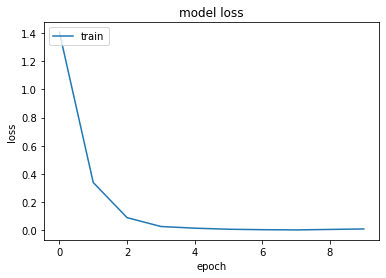

In [8]:
# Compile model with Adam Optimizer
optimizer = tf.keras.optimizers.Adam(lr=1e-5)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
print("Training...")
history = model.fit(x=np.array(train_imgs), 
        y=y_train,
        epochs=10, batch_size=32)
print("Training Complete")

# Plot
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [9]:
# Save model
model.save('model2')

INFO:tensorflow:Assets written to: model9/assets


In [ ]:
# Download from collab

# from google.colab import drive
# drive.mount('/content/drive')

# !zip -r /content/model2.zip /content/model2/

# from google.colab import files
# files.download("/content/model2.zip")